<a href="https://colab.research.google.com/github/ameneh1376/winter_AI_school/blob/master/protein_seq_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install SeqIO

     |████████████████████████████████| 3.4MB 5.0MB/s 
     |████████████████████████████████| 3.8MB 29.0MB/s 
     |████████████████████████████████| 1.2MB 45.2MB/s 


In [ ]:
pip install biopython

     |████████████████████████████████| 2.3MB 5.6MB/s 


# preprocess and label data

In [ ]:
import pandas as pd

  
def load_data(species):


  print(species,'is loading..............')
  label = pd.read_excel (r'/content/drive/MyDrive/data/OGEE_label.xlsx', sheet_name = species)  # load label
  data = pd.read_excel (r'/content/drive/MyDrive/data/OGEE_sequence.xlsx', sheet_name = species)  # load data
  
  data['label']=label['essentiality']   # attach label to data
  data['locus_2'] = label['locus']

  for i in range(data['locus'].shape[0]):   # match data and label
    flage = 0
    for j in range(label['locus'].shape[0]):
      if  str(data['locus'][data.index[i]]).lower() in str(label['locus'][label.index[j]]).lower():
        data['label'][data.index[i]] = label['essentiality'][label.index[j]]
        data['locus_2'][data.index[i]] = label['locus'][label.index[j]]
  print('data and label match together.')

  ess = 0
  noness = 0
  for i in data.index:    # delete invalid data
    # print(i)
    if len(str(data['proteinSeq'][i]))<9:
      data.drop([i],axis=0,inplace=True)
    if str(data['locus_2'][i]).lower()=='nan':
      # print(i)
      data.drop([i],axis=0,inplace=True)
    elif str(data['label'][i]).lower() == 'nan':
      data.drop([i],axis=0,inplace=True)
    elif str(data['locus'][i]).lower() == 'nan':
      data.drop([i],axis=0,inplace=True)
    elif str(data['label'][i]).lower() == 'conditional':
      data.drop([i],axis=0,inplace=True)
    elif str(data['label'][i]).lower() == 'c' :
      data.drop([i],axis=0,inplace=True)
    elif str(data['label'][i]).lower() == 'ne' or str(data['label'][i]).lower() == 'nonessential':
      data['label'][i]=0
      noness += 1
    elif str(data['label'][i]).lower() == 'e' or str(data['label'][i]).lower() == 'essential':
      data['label'][i]=1
      ess += 1
  print('invalid data is deleted.')
  
  for i in data.index:         #delete * from end of sequence
    data['proteinSeq'][i] = str(data['proteinSeq'][i]).replace('*', '')
  print('preprocess is finished.')

  return data,ess, noness



# ********************************************************************************************************************
# ************************************main part(load and preprocess all data)*****************************************
# ********************************************************************************************************************


from openpyxl import load_workbook

species_all = ['SP_OGEE' ,'SC_OGEE' ,'Ce_OGEE' ,'Dm_OGEE' ,'Mm_OGEE']
filepath = "/content/drive/MyDrive/data/new_ogee.xlsx"
wb=load_workbook(filepath)
writer = pd.ExcelWriter(filepath, engine='openpyxl')
writer.book = wb
df = pd.DataFrame()
j = 0
ss = []
c_nonessen = [0,0,0,0,0]
c_essen= [0,0,0,0,0]
for s in species_all:
  noness = 0
  ess = 0
  data, ess, noness = load_data(s)
  c_nonessen[j] += noness
  c_essen[j] += ess
  ss.append(data.shape[0])
  print(s,' :   ',ss[j],' =  ',noness,'(nonessentail) +  ',ess,'(essentail)')
  j += 1
  df = df.append(data)
  wb.create_sheet(s)    # create new sheet
  wb.save(filepath)
  data.to_excel(writer, sheet_name = s)
  writer.save()
  print(s,'is saved.')
writer.close()
# print('all data shape : ',df.shape)

SP_OGEE is loading..............
data and label match together.
invalid data is deleted.
preprocess is finished.
SP_OGEE  :    4906  =   3412 (nonessentail) +   1494 (essentail)
SP_OGEE is saved.
SC_OGEE is loading..............
data and label match together.
invalid data is deleted.
preprocess is finished.
SC_OGEE  :    5819  =   4817 (nonessentail) +   1002 (essentail)
SC_OGEE is saved.
Ce_OGEE is loading..............
data and label match together.
invalid data is deleted.
preprocess is finished.
Ce_OGEE  :    15906  =   14854 (nonessentail) +   1052 (essentail)
Ce_OGEE is saved.
Dm_OGEE is loading..............
data and label match together.
invalid data is deleted.
preprocess is finished.
Dm_OGEE  :    14008  =   10503 (nonessentail) +   3505 (essentail)
Dm_OGEE is saved.
Mm_OGEE is loading..............
data and label match together.
invalid data is deleted.
preprocess is finished.
Mm_OGEE  :    14253  =   11188 (nonessentail) +   3065 (essentail)
Mm_OGEE is saved.


# plot data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':


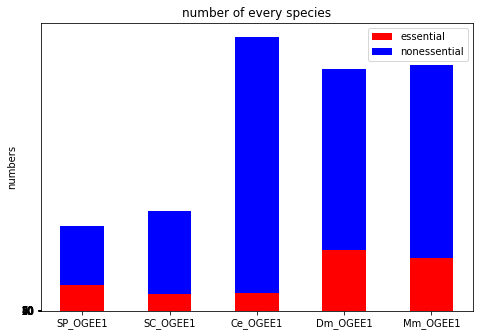

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
N = 5
ind =['SP_OGEE1', 'SC_OGEE1' ,'Ce_OGEE1' ,'Dm_OGEE1' ,'Mm_OGEE1'] # the x locations for the groups
width = 0.5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind,c_essen, width, color='r')
ax.bar(ind, c_nonessen, width,bottom=c_essen, color='b')
ax.set_ylabel('numbers')
ax.set_title('number of every species')
ax.set_xticks(ind, ('SP_OGEE1', 'SC_OGEE1' ,'Ce_OGEE1' ,'Dm_OGEE1' ,'Mm_OGEE1'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['essential', 'nonessential'])
plt.savefig('data_Distribution.png')
plt.show()

# convert data to fasta file

In [ ]:
import pandas as pd
species_all = ['SP_OGEE1' ,'SC_OGEE1' ,'Ce_OGEE1' ,'Dm_OGEE1' ,'Mm_OGEE1']
df = pd.DataFrame()
for s in species_all:
  data = pd.read_excel (r'/content/drive/MyDrive/data/new_ogee.xlsx', sheet_name = s)  # load data
  df = df.append(data)


In [ ]:
file1 = open(r"/content/drive/MyDrive/data/fastaaa.txt","w+") 
for index,row in df.iterrows():
  file1.write( ">"+str(row['locus'])+"\n"+str(row['proteinSeq'])+"\n")
file1.close()

# from Bio import SeqIO
# for record in SeqIO.parse('/content/drive/MyDrive/data_fasta.fasta', "fasta"):
#     print(record.id)

# **extract feature**

In [ ]:
!git clone https://github.com/Superzchen/iFeature

Cloning into 'iFeature'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 292 (delta 0), reused 0 (delta 0), pack-reused 288
Receiving objects: 100% (292/292), 6.72 MiB | 27.18 MiB/s, done.
Resolving deltas: 100% (129/129), done.


In [ ]:
import iFeature

In [ ]:
!python /content/iFeature/iFeature.py --help

usage: it's usage tip.

Generating various numerical representation schemes for protein sequences

optional arguments:
  -h, --help            show this help message and exit
  --file FILE           input fasta file
  --type {AAC,EAAC,CKSAAP,DPC,DDE,TPC,BINARY,GAAC,EGAAC,CKSAAGP,GDPC,GTPC,AAINDEX,ZSCALE,BLOSUM62,NMBroto,Moran,Geary,CTDC,CTDT,CTDD,CTriad,KSCTriad,SOCNumber,QSOrder,PAAC,APAAC,KNNprotein,KNNpeptide,PSSM,SSEC,SSEB,Disorder,DisorderC,DisorderB,ASA,TA}
                        the encoding type
  --path FILEPATH       data file path used for 'PSSM', 'SSEB(C)',
                        'Disorder(BC)', 'ASA' and 'TA' encodings
  --train TRAINFILE     training file in fasta format only used for
                        'KNNprotein' or 'KNNpeptide' encodings
  --label LABELFILE     sample label file only used for 'KNNprotein' or
                        'KNNpeptide' encodings
  --order {alphabetically,polarity,sideChainVolume,userDefined}
                        output order for of 

In [ ]:
!python /content/iFeature/iFeature.py

usage: it's usage tip.
iFeature.py: error: the following arguments are required: --file, --type


In [ ]:
!python /content/iFeature/iFeature.py --file /content/drive/MyDrive/data/fastaaa1.fasta --type AAC --out AAC.txt

Descriptor type: AAC


In [ ]:
!python /content/iFeature/iFeature.py --file /content/drive/MyDrive/data/fastaaa1.fasta --type EAAC --out EAAC.txt

Descriptor type: EAAC
Error: for "EAAC" encoding, the input fasta sequences should be with equal length. 




In [ ]:
!python /content/iFeature/iFeature.py --file /content/drive/MyDrive/data/fastaaa1.fasta --type CKSAAP --out CKSAAP.txt

Descriptor type: CKSAAP


In [ ]:
!python /content/iFeature/iFeature.py --file /content/drive/MyDrive/data/fastaaa1.fasta --type DPC --out DPC.txt

Descriptor type: DPC


In [ ]:
!python /content/iFeature/iFeature.py --file /content/drive/MyDrive/data/fastaaa1.fasta --type DDE --out DDE.txt

Descriptor type: DDE


In [ ]:
!python /content/iFeature/iFeature.py --file /content/drive/MyDrive/data/fastaaa1.fasta --type TPC --out TPC.txt

Descriptor type: TPC
^C


In [ ]:
!python /content/iFeature/iFeaturePseKRAAC.py --show

The 'raactype' value for each subtype descriptor could be chosen from:
	type1    [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
	type2	 [2, 3, 4, 5, 6,    8,                        15,                 20]
	type3A   [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
	type3B   [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
	type4	 [         5,       8, 9,     11,     13,                         20]
	type5    [   3, 4,          8,    10,                 15,                 20]
	type6A   [      4, 5,                                                     20]
	type6B   [         5,                                                       ]
	type6C   [         5,                                                       ]
	type7    [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
	type8    [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
	type9    [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1

In [ ]:
!python /content/iFeature/iFeaturePseKRAAC.py --file /content/drive/MyDrive/data/fastaaa1.fasta --type type1 --subtype lambda-correlation --ktuple 2 --gap_lambda 2 --raactype 5

type1.type1(fastas, subtype, args.raactype, ktuple, args.gap_lambda)
Descriptor type: type1
Subtype model: lambda-correlation
reduced amino acids cluster type: 5
k_tuple peptide number: 2
gap or lambda value: 2




In [ ]:
# # feature extract with other way

# from Bio.SeqUtils.ProtParam import ProteinAnalysis
# import itertools as it
# def format_output(aa_count,cnt):				 # write the extracted feature values to arff (weka), txt(svm) and csv file
# 		a=(dict(zip(it.count(), list(aa_count.values()))))
# 		with open("/content/drive/MyDrive/data/train_dl.csv","a+") as DPL: DPL.write(''.join("{},".format(x) for x in list(aa_count.values()))+str(round(aromat,3))+","+str(round(fraction[0],3))+","+str(round(fraction[1],3))+","+str(round(fraction[2],3))+","+str(round(iso,3))+","+str(mol_w)+","+str(ins)+","+str(cnt)+"\n")
# c=0
# for seq,cl in zip(df['proteinSeq'],df['label']):
#   _= ProteinAnalysis(str(seq))
#   aa_count=(_.count_amino_acids())

#   aromat = _.aromaticity()
#   fraction = _.secondary_structure_fraction()
#   iso = _.isoelectric_point()
#   print(c)
#   c+=1
#   try:
#     mol_w = ("%0.2f" % _.molecular_weight())
#     ins=("%0.2f" %_.instability_index())
#   except:
#     mol_w,ins=mol_w,ins
#   format_output(aa_count,cl)

Streaming output truncated to the last 5000 lines.
49892
49893
49894
49895
49896
49897
49898
49899
49900
49901
49902
49903
49904
49905
49906
49907
49908
49909
49910
49911
49912
49913
49914
49915
49916
49917
49918
49919
49920
49921
49922
49923
49924
49925
49926
49927
49928
49929
49930
49931
49932
49933
49934
49935
49936
49937
49938
49939
49940
49941
49942
49943
49944
49945
49946
49947
49948
49949
49950
49951
49952
49953
49954
49955
49956
49957
49958
49959
49960
49961
49962
49963
49964
49965
49966
49967
49968
49969
49970
49971
49972
49973
49974
49975
49976
49977
49978
49979
49980
49981
49982
49983
49984
49985
49986
49987
49988
49989
49990
49991
49992
49993
49994
49995
49996
49997
49998
49999
50000
50001
50002
50003
50004
50005
50006
50007
50008
50009
50010
50011
50012
50013
50014
50015
50016
50017
50018
50019
50020
50021
50022
50023
50024
50025
50026
50027
50028
50029
50030
50031
50032
50033
50034
50035
50036
50037
50038
50039
50040
50041
50042
50043
50044
50045
50046
50047
50048
50049
5

# load and normalize data

In [ ]:
#********************************************************************************************************
# ***********************************************************************************************************
import pandas as pd
# from sklearn.model_selection import LeaveOneOut
path=r"/content/drive/MyDrive/data/train_dl.csv"
X = pd.read_csv(path)
y = X[:][X.columns[27]]
X.drop([X.columns[27]],axis=1,inplace=True)
X.columns = ['index', 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
y=y.astype('int')
# print(X)
X_normalized = (X - X.mean(axis=0)) / (X.std(axis=0))
# print(X_normalized)


In [ ]:
import pandas as pd
import numpy as np
path=r"/content/drive/MyDrive/data/train_dl.csv"
path2=r'/content/drive/MyDrive/data/ProtrWso.csv'
X = pd.read_csv(path2)
yy=pd.read_csv(path)
y = yy[:344][yy.columns[27]]

# X.drop(list(a),axis=0,inplace=True)
X.drop(['Unnamed: 0'],axis=1,inplace=True)
y=y.astype('int')

# X_normalized = (X - X.mean(axis=0)) / (X.std(axis=0))

In [ ]:
import pandas as pd
import numpy as np
path=r"/content/drive/MyDrive/data/train_dl.csv"
# path2=r'/content/drive/MyDrive/data/aaa.csv'
X = pd.read_excel (r'/content/drive/MyDrive/data/aaa.xlsx')
yy=pd.read_csv(path)
y = yy[:][yy.columns[27]]

# X.drop([0],axis=0,inplace=True)
X.drop(['#'],axis=1,inplace=True)
y=y.astype('int')

In [ ]:
for i in y.index:
  if not(i in X.index):
    y.drop([i],axis=0,inplace=True)

# # a = range(54770,54891)
# 
# print(X.shape)
print(y)

0        0
1        0
2        1
3        0
4        0
        ..
54764    0
54765    0
54766    0
54767    0
54768    0
Name: 0.1, Length: 54769, dtype: int64


In [ ]:

print(X.shape)
print(y.shape)
# X = float(X)

(54891, 27)
(54891,)


In [ ]:
X

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,Unnamed: 21,Unnamed: 22,T1.G.1_T1.G.1_LC2,T1.G.1_T1.G.2_LC2,T1.G.1_T1.G.3_LC2,T1.G.1_T1.G.4_LC2,T1.G.1_T1.G.5_LC2,T1.G.2_T1.G.1_LC2,T1.G.2_T1.G.2_LC2,T1.G.2_T1.G.3_LC2,T1.G.2_T1.G.4_LC2,T1.G.2_T1.G.5_LC2,T1.G.3_T1.G.1_LC2,T1.G.3_T1.G.2_LC2,T1.G.3_T1.G.3_LC2,T1.G.3_T1.G.4_LC2,T1.G.3_T1.G.5_LC2,T1.G.4_T1.G.1_LC2,T1.G.4_T1.G.2_LC2,T1.G.4_T1.G.3_LC2,T1.G.4_T1.G.4_LC2,T1.G.4_T1.G.5_LC2,T1.G.5_T1.G.1_LC2,T1.G.5_T1.G.2_LC2,T1.G.5_T1.G.3_LC2,T1.G.5_T1.G.4_LC2,T1.G.5_T1.G.5_LC2
0,0.067039,0.000000,0.022346,0.027933,0.083799,0.044693,0.044693,0.067039,0.089385,0.134078,0.011173,0.033520,0.067039,0.033520,0.033520,0.100559,0.050279,0.050279,0.011173,0.027933,NaN,NaN,9.0,9.0,7.0,0.0,5.0,5.0,9.0,13.0,5.0,15.0,7.0,17.0,13.0,1.0,12.0,3.0,0.0,3.0,0.0,2.0,6.0,10.0,15.0,2.0,9.0
1,0.061135,0.000000,0.043668,0.043668,0.043668,0.026201,0.021834,0.048035,0.074236,0.091703,0.017467,0.056769,0.104803,0.048035,0.052402,0.109170,0.061135,0.056769,0.021834,0.017467,NaN,NaN,3.0,3.0,8.0,0.0,9.0,3.0,7.0,20.0,1.0,18.0,10.0,15.0,23.0,4.0,24.0,2.0,0.0,3.0,0.0,1.0,6.0,23.0,22.0,1.0,21.0
2,0.054171,0.006501,0.065005,0.067172,0.063922,0.067172,0.033586,0.057421,0.049837,0.072589,0.015168,0.053088,0.050921,0.027086,0.054171,0.075840,0.050921,0.059588,0.023835,0.052004,NaN,NaN,25.0,30.0,39.0,15.0,51.0,33.0,39.0,33.0,14.0,68.0,40.0,49.0,65.0,10.0,56.0,11.0,15.0,19.0,2.0,15.0,51.0,55.0,64.0,21.0,101.0
3,0.090452,0.000000,0.060302,0.085427,0.035176,0.045226,0.020101,0.030151,0.065327,0.065327,0.015075,0.065327,0.050251,0.055276,0.085427,0.095477,0.045226,0.055276,0.010050,0.025126,NaN,NaN,1.0,3.0,2.0,1.0,10.0,2.0,4.0,6.0,2.0,19.0,5.0,9.0,26.0,1.0,15.0,1.0,2.0,6.0,0.0,0.0,9.0,14.0,16.0,5.0,38.0
4,0.039161,0.027972,0.060140,0.065734,0.055944,0.040559,0.027972,0.055944,0.076923,0.085315,0.020979,0.072727,0.048951,0.039161,0.039161,0.083916,0.046154,0.048951,0.013986,0.050350,NaN,NaN,16.0,21.0,30.0,4.0,34.0,23.0,30.0,35.0,6.0,57.0,19.0,40.0,43.0,7.0,66.0,2.0,5.0,7.0,0.0,15.0,46.0,54.0,60.0,12.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54764,0.068027,0.027211,0.074830,0.027211,0.040816,0.040816,0.027211,0.081633,0.054422,0.081633,0.027211,0.047619,0.102041,0.034014,0.054422,0.061224,0.054422,0.034014,0.020408,0.040816,NaN,NaN,2.0,2.0,9.0,1.0,5.0,5.0,7.0,7.0,1.0,12.0,4.0,12.0,12.0,3.0,14.0,1.0,3.0,0.0,0.0,2.0,7.0,8.0,17.0,1.0,10.0
54765,0.043478,0.012422,0.142857,0.142857,0.055901,0.074534,0.000000,0.049689,0.080745,0.080745,0.074534,0.031056,0.012422,0.031056,0.024845,0.031056,0.043478,0.049689,0.000000,0.018634,NaN,NaN,0.0,4.0,2.0,0.0,6.0,3.0,8.0,4.0,3.0,22.0,1.0,2.0,4.0,3.0,13.0,0.0,5.0,2.0,1.0,4.0,8.0,21.0,11.0,5.0,27.0
54766,0.126471,0.035294,0.050000,0.061765,0.014706,0.070588,0.017647,0.011765,0.017647,0.150000,0.005882,0.002941,0.117647,0.023529,0.147059,0.073529,0.026471,0.029412,0.008824,0.008824,NaN,NaN,2.0,1.0,7.0,2.0,5.0,4.0,16.0,21.0,4.0,20.0,8.0,25.0,50.0,11.0,35.0,0.0,6.0,11.0,3.0,4.0,3.0,18.0,40.0,4.0,38.0
54767,0.092044,0.007800,0.071763,0.071763,0.040562,0.082683,0.012480,0.060842,0.071763,0.078003,0.015601,0.046802,0.034321,0.040562,0.054602,0.056162,0.065523,0.073323,0.003120,0.020281,NaN,NaN,4.0,11.0,11.0,8.0,15.0,11.0,27.0,34.0,12.0,61.0,10.0,39.0,43.0,15.0,57.0,6.0,9.0,16.0,6.0,16.0,18.0,59.0,59.0,12.0,80.0


# **feature selection**

In [ ]:
# from sklearn.feature_selection import mutual_info_classif
# importances = mutual_info_classif(X,y)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_cat =X.astype('int')
chi2_features =SelectKBest(chi2,k=50)
x_k_bestfeature = chi2_features.fit_transform(X_cat,y)

print(x_k_bestfeature.shape)
X_train,aa_test,Y_train,yy_test = train_test_split(x_k_bestfeature, y, test_size = 0.1)
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)
print(clf.score(aa_test,yy_test))
print(X.shape)
X_train,aa_test,Y_train,yy_test = train_test_split(X, y, test_size = 0.1)
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)
print(clf.score(aa_test,yy_test))


(344, 50)
0.6
(344, 9920)
0.6857142857142857


In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train,aa_test,Y_train,yy_test = train_test_split(X, y, test_size = 0.1)
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)
clf.score(aa_test,yy_test)

ValueError: ignored

In [ ]:
X[0:10][X.columns[d]]

,LD,WE,CP,LP,KMA,PVA,SWR,QKQ,LIH,VTH,QEI,YDL,CSK,DWK,NQP,IGS,ANT,SST,DFY,CHAM810101.lag11,prop4.G2.residue0,VS663,VS317,VS127
0,0.011236,0.000000,0.000000,0.028090,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.005650,0.000000,0.054955,1.117318,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.021930,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.008597,3.056769,0.142857,0.000000,0.000000
2,0.006508,0.002169,0.000000,0.002169,0.0,0.000000,0.0,0.000000,0.0,0.001086,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.039232,0.650054,0.095238,0.047619,0.047619
3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.005076,0.000000,0.000000,0.066207,5.025126,0.000000,0.000000,0.000000
4,0.004202,0.000000,0.002801,0.002801,0.0,0.001403,0.0,0.000000,0.0,0.000000,0.0,0.001403,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.012785,1.118881,0.076923,0.076923,0.000000
5,0.000000,0.000000,0.000000,0.025641,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.014356,2.542373,0.333333,0.000000,0.000000
6,0.011976,0.000000,0.000000,0.011976,0.0,0.006024,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.045041,2.380952,0.000000,0.000000,0.000000
7,0.005479,0.000000,0.000000,0.010959,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.002747,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.029006,0.819672,0.125000,0.000000,0.000000
8,0.001961,0.000000,0.000000,0.001961,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.001965,0.000000,0.0,0.0,0.0,0.000000,0.001965,0.000000,0.050987,0.391389,0.090909,0.000000,0.090909
9,0.001698,0.000000,0.001698,0.005093,0.0,0.000000,0.0,0.001701,0.0,0.000000,0.0,0.001701,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.001701,0.068495,0.508475,0.500000,0.000000,0.083333


In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train,aa_test,Y_train,yy_test = train_test_split(X, y, test_size = 0.1)
clf = DecisionTreeClassifier()
clf.fit(X_train[:][X_train.columns[d]],Y_train)
print(clf.score(aa_test[:][X.columns[d]],yy_test))
print(clf.score(X_train[:][X_train.columns[d]],Y_train))

NameError: ignored

In [ ]:

d=[]
a = clf.feature_importances_
k=0
for j in range(9920):
  # print(a[j])
  if a[j]!=0:
    print(a[j])
    d.append(j)
    print('*****************************************',j)
    k+=1

print('k',k)

NotFittedError: ignored

In [ ]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(random_state=0)
regr.coef_=50
regr.fit(X, y)
y_pre = regr.predict(X)
roc_auc_score(y_test, y_predictt)

# **classifier**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score,auc,precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
# ********************************************************************************************************************
# *************************************************classifiers********************************************************
# ********************************************************************************************************************
names = ["dummy_clf","GradientBoosting",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes","Nearest Neighbors"]
classifiers = [
    DummyClassifier(),
    GradientBoostingClassifier(n_estimators=20, learning_rate=0.25,max_features=2,max_depth=2, random_state=0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_features='log2',oob_score=True,random_state=11),
    MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
    AdaBoostClassifier(),
    GaussianNB(),
    KNeighborsClassifier(3)]

ROC_AUC = np.zeros((2,5,8,10))
PR_AUC = np.zeros((2,5,8,10))
ACCURACY = np.zeros((2,5,8,10))

accuracy1=[]
accuracy2=[]
roc_auc1=[]
roc_auc2=[]
pr_auc1=[]
pr_auc2=[]

species_all = ['SP_OGEE1','SC_OGEE1' ,'Ce_OGEE1' ,'Dm_OGEE1' ,'Mm_OGEE1']
a = 0
train_sizes = np.arange(0.1,1.1,0.1)
length=[4906, 5819, 15906, 14008, 14253]
# fig, axs = plt.subplots(10,1)
for i in range(5):
  # ********************************************************************************************************************
  # *****************************************splite train and test data*************************************************
  # ********************************************************************************************************************
  a_test = pd.DataFrame() 
  a_train = pd.DataFrame() 
  y_test = pd.DataFrame() 
  y_train = pd.DataFrame()   
  a_test, y_test = X.iloc[a:a+length[i]-1,:], y.iloc[a:a+length[i]-1]
  a_train , y_train = X.copy() ,  y.copy()
  a_train.drop(a_train.index[a:a+length[i]-1], inplace=True, axis=0)
  y_train.drop(y_train.index[a:a+length[i]-1], inplace=True, axis=0)
  a = a + length[i]
  print("*****************************************************************************************************************")
  print(species_all[i],'is test and others are train.\ntrain data size: ',a_train.shape,'\ntest data size: ',a_test.shape)
  
  
  # ********************************************************************************************************************
  # **************************************fit model(MLP-RF-DT-GB-SVM-GLM)***********************************************
  # ********************************************************************************************************************
  j=0
  # plt.subplot(5,1,i+1)

  for name, clf in zip(names, classifiers):
    for step in np.arange(0.09,1,0.1) :
      X_train,aa_test,Y_train,yy_test = train_test_split(a_train, y_train, test_size = step)
      clf.fit(X_train, Y_train)
      try:
        kk1 = clf.predict_proba(a_test, y_test)
        kk2 = clf.predict_proba(X_train,Y_train)
        y_predict_test = kk1[:, 1]
        y_predict_train = kk2[:, 1]
      except:
        y_predict_test = clf.predict(a_test)
        y_predict_train = clf.predict(X_train)
      # ***********************************************score***********************************************
      accuracy1.append(clf.score(X_train, Y_train))#train
      accuracy2.append(clf.score(a_test,y_test)) #test
      print(species_all[i],'----------> acuray for',name,'train size(',1-step,') : ',clf.score(a_test,y_test))
      roc_auc1.append(roc_auc_score(Y_train, y_predict_train))#train
      roc_auc2.append(roc_auc_score(y_test, y_predict_test))#test
      # precision1, recall1, threshold = precision_recall_curve(Y_train, y_predict_train)#train
      pr_auc1.append(average_precision_score(Y_train, y_predict_train))
      # pr_auc1.append(float(auc(precision1, recall1)))#train
      precision2, recall2, threshold = precision_recall_curve(y_test, y_predict_test)#test 
      pr_auc2.append(average_precision_score(y_test, y_predict_test))
      # pr_auc2.append(float(auc(precision2, recall2)))#test
      # *****************************************************************************************************
    # TRAIN :0
    ROC_AUC[0][i][j]=roc_auc1
    PR_AUC[0][i][j]=pr_auc1
    ACCURACY[0][i][j] =accuracy1
    # TEST :1
    ROC_AUC[1][i][j]=roc_auc2
    PR_AUC[1][i][j]=pr_auc2
    ACCURACY[1][i][j] =accuracy2
    # CLEAR
    roc_auc1.clear()
    roc_auc2.clear()
    pr_auc1.clear()
    pr_auc2.clear()
    accuracy1.clear()
    accuracy2.clear()
    j+=1


*****************************************************************************************************************
SP_OGEE1 is test and others are train.
train data size:  (49864, 45) 
test data size:  (4905, 45)
SP_OGEE1 ----------> acuray for dummy_clf train size( 0.91 ) :  0.6279306829765545
SP_OGEE1 ----------> acuray for dummy_clf train size( 0.81 ) :  0.6244648318042814
SP_OGEE1 ----------> acuray for dummy_clf train size( 0.71 ) :  0.6199796126401631


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


SP_OGEE1 ----------> acuray for dummy_clf train size( 0.61 ) :  0.6256880733944954
SP_OGEE1 ----------> acuray for dummy_clf train size( 0.51 ) :  0.6207951070336392
SP_OGEE1 ----------> acuray for dummy_clf train size( 0.41000000000000003 ) :  0.6330275229357798
SP_OGEE1 ----------> acuray for dummy_clf train size( 0.30999999999999994 ) :  0.6277268093781855
SP_OGEE1 ----------> acuray for dummy_clf train size( 0.20999999999999996 ) :  0.6338430173292559
SP_OGEE1 ----------> acuray for dummy_clf train size( 0.10999999999999999 ) :  0.6250764525993884


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarn

SP_OGEE1 ----------> acuray for dummy_clf train size( 0.010000000000000009 ) :  0.6228338430173292
SP_OGEE1 ----------> acuray for GradientBoosting train size( 0.91 ) :  0.6954128440366972
SP_OGEE1 ----------> acuray for GradientBoosting train size( 0.81 ) :  0.6954128440366972
SP_OGEE1 ----------> acuray for GradientBoosting train size( 0.71 ) :  0.6954128440366972
SP_OGEE1 ----------> acuray for GradientBoosting train size( 0.61 ) :  0.6954128440366972
SP_OGEE1 ----------> acuray for GradientBoosting train size( 0.51 ) :  0.6952089704383282
SP_OGEE1 ----------> acuray for GradientBoosting train size( 0.41000000000000003 ) :  0.6954128440366972
SP_OGEE1 ----------> acuray for GradientBoosting train size( 0.30999999999999994 ) :  0.6954128440366972
SP_OGEE1 ----------> acuray for GradientBoosting train size( 0.20999999999999996 ) :  0.6950050968399593
SP_OGEE1 ----------> acuray for GradientBoosting train size( 0.10999999999999999 ) :  0.6954128440366972
SP_OGEE1 ----------> acuray for

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


SC_OGEE1 ----------> acuray for dummy_clf train size( 0.61 ) :  0.707287727741492
SC_OGEE1 ----------> acuray for dummy_clf train size( 0.51 ) :  0.7036782399449982
SC_OGEE1 ----------> acuray for dummy_clf train size( 0.41000000000000003 ) :  0.7059126847713991
SC_OGEE1 ----------> acuray for dummy_clf train size( 0.30999999999999994 ) :  0.7019594362323822
SC_OGEE1 ----------> acuray for dummy_clf train size( 0.20999999999999996 ) :  0.6995531110347198
SC_OGEE1 ----------> acuray for dummy_clf train size( 0.10999999999999999 ) :  0.7084908903403231


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarn

SC_OGEE1 ----------> acuray for dummy_clf train size( 0.010000000000000009 ) :  0.6952561017531798
SC_OGEE1 ----------> acuray for GradientBoosting train size( 0.91 ) :  0.8277758679958749
SC_OGEE1 ----------> acuray for GradientBoosting train size( 0.81 ) :  0.8277758679958749
SC_OGEE1 ----------> acuray for GradientBoosting train size( 0.71 ) :  0.8277758679958749
SC_OGEE1 ----------> acuray for GradientBoosting train size( 0.61 ) :  0.8277758679958749
SC_OGEE1 ----------> acuray for GradientBoosting train size( 0.51 ) :  0.8277758679958749
SC_OGEE1 ----------> acuray for GradientBoosting train size( 0.41000000000000003 ) :  0.8277758679958749
SC_OGEE1 ----------> acuray for GradientBoosting train size( 0.30999999999999994 ) :  0.8277758679958749
SC_OGEE1 ----------> acuray for GradientBoosting train size( 0.20999999999999996 ) :  0.8274321072533517
SC_OGEE1 ----------> acuray for GradientBoosting train size( 0.10999999999999999 ) :  0.8270883465108284
SC_OGEE1 ----------> acuray for

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarn

Ce_OGEE1 ----------> acuray for dummy_clf train size( 0.61 ) :  0.7219113486325055
Ce_OGEE1 ----------> acuray for dummy_clf train size( 0.51 ) :  0.7312794718641936
Ce_OGEE1 ----------> acuray for dummy_clf train size( 0.41000000000000003 ) :  0.7298962590380383
Ce_OGEE1 ----------> acuray for dummy_clf train size( 0.30999999999999994 ) :  0.7371895630304935
Ce_OGEE1 ----------> acuray for dummy_clf train size( 0.20999999999999996 ) :  0.7259352404904118
Ce_OGEE1 ----------> acuray for dummy_clf train size( 0.10999999999999999 ) :  0.7396416221314052


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarn

Ce_OGEE1 ----------> acuray for dummy_clf train size( 0.010000000000000009 ) :  0.7218484753222257
Ce_OGEE1 ----------> acuray for GradientBoosting train size( 0.91 ) :  0.9337944042753851
Ce_OGEE1 ----------> acuray for GradientBoosting train size( 0.81 ) :  0.9335429110342659
Ce_OGEE1 ----------> acuray for GradientBoosting train size( 0.71 ) :  0.9337944042753851
Ce_OGEE1 ----------> acuray for GradientBoosting train size( 0.61 ) :  0.9337944042753851
Ce_OGEE1 ----------> acuray for GradientBoosting train size( 0.51 ) :  0.9335429110342659
Ce_OGEE1 ----------> acuray for GradientBoosting train size( 0.41000000000000003 ) :  0.9336686576548255
Ce_OGEE1 ----------> acuray for GradientBoosting train size( 0.30999999999999994 ) :  0.9335429110342659
Ce_OGEE1 ----------> acuray for GradientBoosting train size( 0.20999999999999996 ) :  0.9333542911034266
Ce_OGEE1 ----------> acuray for GradientBoosting train size( 0.10999999999999999 ) :  0.9338572775856648
Ce_OGEE1 ----------> acuray for

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarn

Dm_OGEE1 ----------> acuray for dummy_clf train size( 0.61 ) :  0.6694509887913186
Dm_OGEE1 ----------> acuray for dummy_clf train size( 0.51 ) :  0.669807953166274
Dm_OGEE1 ----------> acuray for dummy_clf train size( 0.41000000000000003 ) :  0.6685942742914257
Dm_OGEE1 ----------> acuray for dummy_clf train size( 0.30999999999999994 ) :  0.6671664167916042
Dm_OGEE1 ----------> acuray for dummy_clf train size( 0.20999999999999996 ) :  0.6670236310416221
Dm_OGEE1 ----------> acuray for dummy_clf train size( 0.10999999999999999 ) :  0.6762333119154709


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarn

Dm_OGEE1 ----------> acuray for dummy_clf train size( 0.010000000000000009 ) :  0.6724494895409439
Dm_OGEE1 ----------> acuray for GradientBoosting train size( 0.91 ) :  0.749767973156279
Dm_OGEE1 ----------> acuray for GradientBoosting train size( 0.81 ) :  0.7495537945313058
Dm_OGEE1 ----------> acuray for GradientBoosting train size( 0.71 ) :  0.7494824016563147
Dm_OGEE1 ----------> acuray for GradientBoosting train size( 0.61 ) :  0.7493396159063326
Dm_OGEE1 ----------> acuray for GradientBoosting train size( 0.51 ) :  0.7493396159063326
Dm_OGEE1 ----------> acuray for GradientBoosting train size( 0.41000000000000003 ) :  0.749767973156279
Dm_OGEE1 ----------> acuray for GradientBoosting train size( 0.30999999999999994 ) :  0.7494110087813236
Dm_OGEE1 ----------> acuray for GradientBoosting train size( 0.20999999999999996 ) :  0.7486970800314129
Dm_OGEE1 ----------> acuray for GradientBoosting train size( 0.10999999999999999 ) :  0.7491254372813593
Dm_OGEE1 ----------> acuray for G

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarn

Mm_OGEE1 ----------> acuray for dummy_clf train size( 0.61 ) :  0.6818117480537863
Mm_OGEE1 ----------> acuray for dummy_clf train size( 0.51 ) :  0.6873319179051663
Mm_OGEE1 ----------> acuray for dummy_clf train size( 0.41000000000000003 ) :  0.6833687190375088
Mm_OGEE1 ----------> acuray for dummy_clf train size( 0.30999999999999994 ) :  0.6884642604387827
Mm_OGEE1 ----------> acuray for dummy_clf train size( 0.20999999999999996 ) :  0.6885350318471337
Mm_OGEE1 ----------> acuray for dummy_clf train size( 0.10999999999999999 ) :  0.6867657466383581


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarn

Mm_OGEE1 ----------> acuray for dummy_clf train size( 0.010000000000000009 ) :  0.6932059447983014
Mm_OGEE1 ----------> acuray for GradientBoosting train size( 0.91 ) :  0.7841472045293701
Mm_OGEE1 ----------> acuray for GradientBoosting train size( 0.81 ) :  0.7840764331210192
Mm_OGEE1 ----------> acuray for GradientBoosting train size( 0.71 ) :  0.7841472045293701
Mm_OGEE1 ----------> acuray for GradientBoosting train size( 0.61 ) :  0.7838641188959661
Mm_OGEE1 ----------> acuray for GradientBoosting train size( 0.51 ) :  0.7842179759377211
Mm_OGEE1 ----------> acuray for GradientBoosting train size( 0.41000000000000003 ) :  0.7840056617126681
Mm_OGEE1 ----------> acuray for GradientBoosting train size( 0.30999999999999994 ) :  0.7840764331210192
Mm_OGEE1 ----------> acuray for GradientBoosting train size( 0.20999999999999996 ) :  0.7842179759377211
Mm_OGEE1 ----------> acuray for GradientBoosting train size( 0.10999999999999999 ) :  0.7828733191790517
Mm_OGEE1 ----------> acuray for

## **plot**

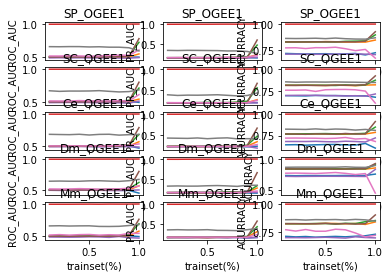

In [ ]:
# plot train
species_all = ['SP_OGEE1','SC_OGEE1' ,'Ce_OGEE1' ,'Dm_OGEE1' ,'Mm_OGEE1']
train_sizes = np.arange(0.1,1.1,0.1)
fig, axs = plt.subplots(5,3)
for s_n in range(5):
  for cl_n in range(8):
    axs[s_n, 0].plot(train_sizes, ROC_AUC[0][s_n][cl_n])
  axs[s_n, 0].set(xlabel='trainset(%)', ylabel='ROC_AUC')
  axs[s_n, 0].set_title(species_all[s_n])
  for cl_n in range(8):
    axs[s_n, 1].plot(train_sizes, PR_AUC[0][s_n][cl_n])
  axs[s_n, 1].set(xlabel='trainset(%)', ylabel='PR_AUC')
  axs[s_n, 1].set_title(species_all[s_n])
  for cl_n in range(8):
    axs[s_n, 2].plot(train_sizes, ACCURACY[0][s_n][cl_n])
  axs[s_n, 2].set(xlabel='trainset(%)', ylabel='ACURRACY') 
  axs[s_n, 2].set_title(species_all[s_n])

# legend((line1, line2, line3), ('label1', 'label2', 'label3'))
# for ax in axs.flat:
#     ax.set(xlabel='trainset(%)', ylabel='0-1')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()


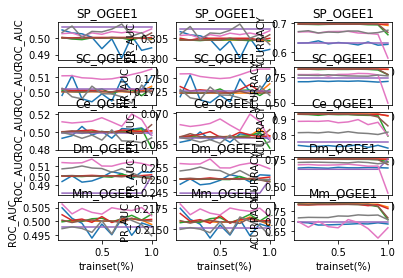

In [ ]:
# plot test
species_all = ['SP_OGEE1','SC_OGEE1' ,'Ce_OGEE1' ,'Dm_OGEE1' ,'Mm_OGEE1']
train_sizes = np.arange(0.1,1.1,0.1)
fig, axs = plt.subplots(5,3)
for s_n in range(5):
  for cl_n in range(8):
    axs[s_n, 0].plot(train_sizes, ROC_AUC[1][s_n][cl_n])
  axs[s_n, 0].set(xlabel='trainset(%)', ylabel='ROC_AUC')
  axs[s_n, 0].set_title(species_all[s_n])
  for cl_n in range(8):
    axs[s_n, 1].plot(train_sizes, PR_AUC[1][s_n][cl_n])
  axs[s_n, 1].set(xlabel='trainset(%)', ylabel='PR_AUC')
  axs[s_n, 1].set_title(species_all[s_n])
  for cl_n in range(8):
    axs[s_n, 2].plot(train_sizes, ACCURACY[1][s_n][cl_n])
  axs[s_n, 2].set(xlabel='trainset(%)', ylabel='ACURRACY') 
  axs[s_n, 2].set_title(species_all[s_n])

# for ax in axs.flat:
#     ax.set(xlabel='trainset(%)', ylabel='0-1')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

In [ ]:
np.random.seed(19680801)
# Z = np.random.rand(6, 10)
# x = np.arange(-0.5, 10, 1)  # len = 11
# y = np.arange(4.5, 11, 1)  # len = 7

# fig, ax = plt.subplots()
# ax.pcolormesh(x, y, Z)
print(ROC_AUC[0][1][:][:].shape)
# plot test
names = ["dummy_clf","GradientBoosting",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes","Nearest Neighbors"]
species_all = ['SP_OGEE1','SC_OGEE1' ,'Ce_OGEE1' ,'Dm_OGEE1' ,'Mm_OGEE1']
train_sizes = np.arange(0.1,1.1,0.2)
plt.subplots(5,1)

# for s_n in range(5):
plt.subplot(5,1,s_n+1)
plt.pcolormesh(names,species_all,ROC_AUC[1][:][:][-1].reshape((5,8)))


# **train2**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score,auc,precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
# ********************************************************************************************************************
# *************************************************classifiers********************************************************
# ********************************************************************************************************************
names = ["dummy_clf","GradientBoosting",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes","Nearest Neighbors"]
classifiers = [
    DummyClassifier(),
    GradientBoostingClassifier(n_estimators=20, learning_rate=0.25,max_features=2,max_depth=2, random_state=0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_features='log2',oob_score=True,random_state=11),
    MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
    AdaBoostClassifier(),
    GaussianNB(),
    KNeighborsClassifier(3)]

ROC_AUC = np.zeros((5,8,5))
PR_AUC = np.zeros((5,8,5))
ACCURACY = np.zeros((5,8,5))

accuracy1=[]
accuracy2=[]
roc_auc1=[]
roc_auc2=[]
pr_auc1=[]
pr_auc2=[]


a = 0
train_sizes = np.arange(0.1,1.1,0.1)

# fig, axs = plt.subplots(10,1)

# ********************************************************************************************************************
# *****************************************splite train and test data*************************************************
# ********************************************************************************************************************
species_all = ['SP_OGEE1','SC_OGEE1' ,'Ce_OGEE1' ,'Dm_OGEE1' ,'Mm_OGEE1']
sp_ogee = pd.DataFrame() 
sc_ogee = pd.DataFrame() 
ce_ogee = pd.DataFrame() 
dm_ogee = pd.DataFrame()   
mm_ogee = pd.DataFrame() 
sp_ogee_y = pd.DataFrame() 
sc_ogee_y = pd.DataFrame() 
ce_ogee_y = pd.DataFrame() 
dm_ogee_y = pd.DataFrame()   
mm_ogee_y = pd.DataFrame()   
sp_ogee, sp_ogee_y = X.iloc[0:4906,:], y.iloc[0:4906]
print("*****************************************************************************************************************")
print('sp_ogee size: ',sp_ogee.shape)
sc_ogee, sc_ogee_y = X.iloc[4906:4906+5819,:], y.iloc[4906:4906+5819]
print("*****************************************************************************************************************")
print('sc_ogee size: ',sc_ogee.shape)
ce_ogee, ce_ogee_y = X.iloc[4906+5819:4906+5819+15906,:], y.iloc[4906+5819:4906+5819+15906]
print("*****************************************************************************************************************")
print('ce_ogee size: ',ce_ogee.shape)
dm_ogee, dm_ogee_y = X.iloc[4906+5819+15906:4906+5819+15906+14008,:], y.iloc[4906+5819+15906:4906+5819+15906+14008]
print("*****************************************************************************************************************")
print('dm_ogee size: ',dm_ogee.shape)
mm_ogee, mm_ogee_y = X.iloc[4906+5819+15906+14008:4906+5819+15906+14008+14253,:], y.iloc[4906+5819+15906+14008:4906+5819+15906+14008+14253]
print("*****************************************************************************************************************")
print('mm_ogee size: ',mm_ogee.shape)
sss=[]
yyy=[]
# ,sc_ogee,ce_ogee,dm_ogee,mm_ogee]
sss.append(sp_ogee)
sss.append(sc_ogee)
sss.append(ce_ogee)
sss.append(dm_ogee)
sss.append(mm_ogee)
yyy.append(sp_ogee_y)
yyy.append(sc_ogee_y)
yyy.append(ce_ogee_y)
yyy.append(dm_ogee_y)
yyy.append(mm_ogee_y)
# yyy= list[sp_ogee_y,sc_ogee_y,ce_ogee_y,dm_ogee_y,mm_ogee_y]
for i in range(5):
  X_train=sss[i]
  Y_train=yyy[i]

  # ********************************************************************************************************************
  # **************************************fit model(MLP-RF-DT-GB-SVM-GLM)***********************************************
  # ********************************************************************************************************************
  j=0
  for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    for k in range(5):
      a_test=sss[k]
      y_test=yyy[k]
      try:
        kk1 = clf.predict_proba(a_test, y_test)
        y_predict_test = kk1[:, 1]
      except:
        y_predict_test = clf.predict(a_test)
      # ***********************************************score***********************************************
      accuracy2.append(clf.score(a_test,y_test)) #test
      print(species_all[i],'----------> acuray for',name,'train size(',step,') : ',clf.score(a_test,y_test))
      roc_auc2.append(roc_auc_score(y_test, y_predict_test))#test
      precision2, recall2, threshold = precision_recall_curve(y_test, y_predict_test)#test 
      pr_auc2.append(average_precision_score(y_test, y_predict_test))
      # *****************************************************************************************************
    # TEST :1
    ROC_AUC[i][j]=roc_auc2
    PR_AUC[i][j]=pr_auc2
    ACCURACY[i][j] =accuracy2
    # CLEAR
    pr_auc2.clear()
    roc_auc2.clear()
    accuracy2.clear()
    j+=1

*****************************************************************************************************************
sp_ogee size:  (4906, 45)
*****************************************************************************************************************
sc_ogee size:  (5819, 45)
*****************************************************************************************************************
ce_ogee size:  (15906, 45)
*****************************************************************************************************************
dm_ogee size:  (14008, 45)
*****************************************************************************************************************
mm_ogee size:  (14130, 45)
SP_OGEE1 ----------> acuray for dummy_clf train size( 0.99 ) :  0.5646147574398696
SP_OGEE1 ----------> acuray for dummy_clf train size( 0.99 ) :  0.6306925588589105
SP_OGEE1 ----------> acuray for dummy_clf train size( 0.99 ) :  0.661888595498554
SP_OGEE1 ----------> acuray for dummy_clf train s

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


SP_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.9261913743241544
SP_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.7447886921758995
SP_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.7766454352441614
SP_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.7062780269058296
SP_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.8154322048461935
SP_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.901546586193889
SP_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.7288692175899486
SP_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.7684359518754423
SP_OGEE1 ----------> acuray for Random Forest train size( 0.99 ) :  0.9963310232368529
SP_OGEE1 ----------> acuray for Random Forest train size( 0.99 ) :  0.8228217906856848
SP_OGEE1 ----------> acuray for Random Forest train size( 0.99 ) :  0.9219791273733182
SP_OGEE1 ----------> acuray for Ran

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


SC_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.7496430611079383
SC_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.7843595187544232
SC_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.6922136159804321
SC_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.8353669015294725
SC_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.9219791273733182
SC_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.7355796687607081
SC_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.7615711252653928
SC_OGEE1 ----------> acuray for Random Forest train size( 0.99 ) :  0.6952710966163881
SC_OGEE1 ----------> acuray for Random Forest train size( 0.99 ) :  0.9975940883313285
SC_OGEE1 ----------> acuray for Random Forest train size( 0.99 ) :  0.9331070036464227
SC_OGEE1 ----------> acuray for Random Forest train size( 0.99 ) :  0.7487150199885779
SC_OGEE1 ----------> acuray for Rando

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Ce_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.6954749286587851
Ce_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.827289912356075
Ce_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.9341757827235005
Ce_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.7495002855511137
Ce_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.7839348903043171
Ce_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.695067264573991
Ce_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.8266025090221688
Ce_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.9353074311580536
Ce_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.7465019988577956
Ce_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.781033262561925
Ce_OGEE1 ----------> acuray for Random Forest train size( 0.99 ) :  0.6954749286587851
Ce_OGEE1 ----------> acuray for

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Dm_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.6954749286587851
Dm_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.8278054648565045
Dm_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.9334842197912737
Dm_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.7507852655625357
Dm_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.783651804670913
Dm_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.694863432531594
Dm_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.8274617631895514
Dm_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.932478310071671
Dm_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.7512135922330098
Dm_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.7840764331210192
Dm_OGEE1 ----------> acuray for Random Forest train size( 0.99 ) :  0.6940481043620057
Dm_OGEE1 ----------> acuray for

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Mm_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.6954749286587851
Mm_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.8279773156899811
Mm_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.9336099585062241
Mm_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.7495002855511137
Mm_OGEE1 ----------> acuray for GradientBoosting train size( 0.99 ) :  0.7852087756546355
Mm_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.6956787607011822
Mm_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.8269462106891219
Mm_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.9305293599899409
Mm_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.7468589377498572
Mm_OGEE1 ----------> acuray for Decision Tree train size( 0.99 ) :  0.7861288039631988
Mm_OGEE1 ----------> acuray for Random Forest train size( 0.99 ) :  0.694863432531594
Mm_OGEE1 ----------> acuray f

## **plot2**

(8, 5)


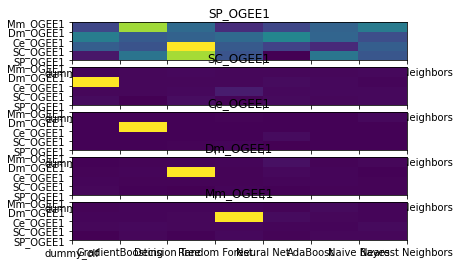

In [ ]:
np.random.seed(19680801)
# Z = np.random.rand(6, 10)
# x = np.arange(-0.5, 10, 1)  # len = 11
# y = np.arange(4.5, 11, 1)  # len = 7

# fig, ax = plt.subplots()
# ax.pcolormesh(x, y, Z)
print(ROC_AUC[1][:][:].shape)
# plot test
names = ["dummy_clf","GradientBoosting",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes","Nearest Neighbors"]
species_all = ['SP_OGEE1','SC_OGEE1' ,'Ce_OGEE1' ,'Dm_OGEE1' ,'Mm_OGEE1']
train_sizes = np.arange(0.1,1.1,0.2)
plt.subplots(5,1)

for s_n in range(5):
  plt.subplot(5,1,s_n+1)
  plt.pcolormesh(names,species_all,ROC_AUC[s_n][:][:].reshape((5,8)))
  plt.title(species_all[s_n])
